In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy 
from scipy.stats import iqr
%matplotlib inline


In [2]:
pictures = pd.read_csv('/home/jupyter-a.kosheleva-14/5_task_1.csv', sep = ',')

In [3]:
pictures

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [4]:
segments = pd.read_csv('/home/jupyter-a.kosheleva-14/5_task_2.csv', sep = ',')

In [5]:
segments

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [7]:
#проводим тест о равенстве дисперсий в группах
scipy.stats.levene(pictures[pictures.group == 'A'].events, 
                   pictures[pictures.group == 'B'].events,
                   pictures[pictures.group == 'C'].events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [8]:
sample_1 = pictures[pictures['group'] == 'A']['events'].sample(1000, random_state=17)

In [9]:
sample_2 = pictures[pictures['group'] == 'B']['events'].sample(1000, random_state=17)

In [10]:
sample_3 = pictures[pictures['group'] == 'C']['events'].sample(1000, random_state=17)

In [11]:
from scipy import stats

In [12]:
#проверяем распределение на нормальность
stats.shapiro(sample_1)

(0.9973153471946716, 0.09609563648700714)

In [13]:
stats.shapiro(sample_2)

(0.9980798363685608, 0.31768906116485596)

In [14]:
stats.shapiro(sample_3)

(0.9981185793876648, 0.3359004259109497)

In [15]:
scipy.stats.f_oneway(pictures[pictures.group == 'A'].events, 
                     pictures[pictures.group == 'B'].events,
                     pictures[pictures.group == 'C'].events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [16]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [17]:
print(pairwise_tukeyhsd(pictures.events, pictures.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [18]:
segments

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [19]:
test = segments.query('group == "test"')

In [20]:
control = segments.query('group == "control"')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


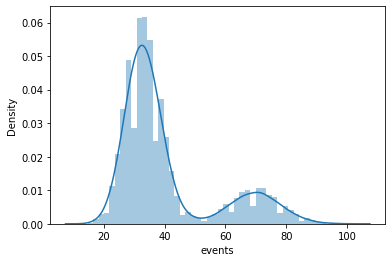

In [21]:
sns.distplot(test.events)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


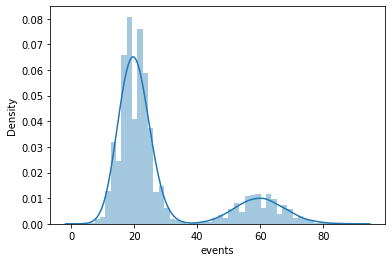

In [22]:
sns.distplot(control.events)

In [23]:
segments.groupby(['group', 'segment']).events.describe()

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

In [24]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [25]:
formula = 'events ~ segment + group + segment:group'
model = ols(formula, segments).fit()
aov_table = anova_lm(model, typ=2)

In [26]:
aov_table

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [27]:
segments['combination'] = segments['group'] + " " + segments['segment']

In [28]:
segments

,id,group,segment,events,combination
0,83440,test,high,78.0,test high
1,96723,test,high,71.0,test high
2,68719,test,high,80.0,test high
3,50399,test,high,80.0,test high
4,95613,test,high,78.0,test high
...,...,...,...,...,...
99995,60695,control,low,15.0,control low
99996,5934,control,low,16.0,control low
99997,30046,control,low,22.0,control low
99998,26474,control,low,21.0,control low


In [29]:
print(pairwise_tukeyhsd(segments.events, segments.combination))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control high control low -39.9392 0.001 -40.1073 -39.7711   True
control high   test high   9.9677 0.001   9.7551  10.1803   True
control high    test low -26.9449 0.001  -27.113 -26.7768   True
 control low   test high  49.9069 0.001  49.7388   50.075   True
 control low    test low  12.9944 0.001   12.888  13.1007   True
   test high    test low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


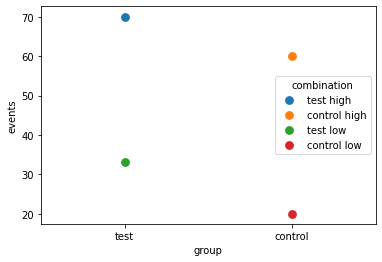

In [30]:
sns.pointplot(x="group", y="events", hue="combination",
                   data=segments)